In [3]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Loading/Reading in the Data
df = pd.read_csv("BTC-USD.csv")

# Data Preprocessing
### Setting the datetime index as the date, only selecting the 'Close' column, then only the last 1000 closing prices.
df = df.set_index("Date")[['Close']].tail(1000)
df = df.set_index(pd.to_datetime(df.index))

# Normalizing/Scaling the Data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

Using TensorFlow backend.


In [4]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(12,4))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)


def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Create a specified number of hidden layers for an RNN
    Optional: Adds regularization option, dropout layer to prevent potential overfitting if necessary
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

### How many periods looking back to train
n_per_in  = 30

# How many periods ahead to predict
n_per_out = 5

# Features (in this case it's 1 because there is only one feature: price)
n_features = 1

# Splitting the data into appropriate sequences
X, y = split_sequence(list(df.Close), n_per_in, n_per_out)

# Reshaping the X variable from 2D to 3D
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [37]:
model = Sequential()

# Activation
activ = "softsign"

# Input layer
model.add(LSTM(30, activation=activ, return_sequences=True, input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=8, n_nodes=12, activation=activ)

# Final Hidden layer
model.add(LSTM(10, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 50, 30)            3840      
_________________________________________________________________
lstm_48 (LSTM)               (None, 50, 12)            2064      
_________________________________________________________________
lstm_49 (LSTM)               (None, 50, 12)            1200      
_________________________________________________________________
lstm_50 (LSTM)               (None, 50, 12)            1200      
_________________________________________________________________
lstm_51 (LSTM)               (None, 50, 12)            1200      
_________________________________________________________________
lstm_52 (LSTM)               (None, 50, 12)            1200      
_________________________________________________________________
lstm_53 (LSTM)               (None, 50, 12)           

In [38]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
res = model.fit(X, y, epochs=600, batch_size=64, validation_split=0.2)

Train on 250 samples, validate on 63 samples
Epoch 1/600
250/250 [==============================] - 1s 5ms/step - loss: 9.4652e-04 - accuracy: 0.4160 - val_loss: 0.0167 - val_accuracy: 0.3175
Epoch 2/600
250/250 [==============================] - 1s 4ms/step - loss: 9.1655e-04 - accuracy: 0.4480 - val_loss: 0.0158 - val_accuracy: 0.3016
Epoch 3/600
250/250 [==============================] - 1s 5ms/step - loss: 8.9102e-04 - accuracy: 0.4480 - val_loss: 0.0160 - val_accuracy: 0.3492
Epoch 4/600
250/250 [==============================] - 1s 5ms/step - loss: 8.9023e-04 - accuracy: 0.4120 - val_loss: 0.0160 - val_accuracy: 0.3333
Epoch 5/600
250/250 [==============================] - 1s 4ms/step - loss: 8.6980e-04 - accuracy: 0.4480 - val_loss: 0.0160 - val_accuracy: 0.3175
Epoch 6/600
250/250 [==============================] - 1s 4ms/step - loss: 8.5932e-04 - accuracy: 0.4240 - val_loss: 0.0161 - val_accuracy: 0.3810
Epoch 7/600
250/250 [==============================] - 1s 5ms/step - loss

250/250 [==============================] - 2s 8ms/step - loss: 8.4837e-04 - accuracy: 0.4480 - val_loss: 0.0162 - val_accuracy: 0.3492
Epoch 57/600
250/250 [==============================] - 2s 9ms/step - loss: 8.4074e-04 - accuracy: 0.4600 - val_loss: 0.0156 - val_accuracy: 0.3175
Epoch 58/600
250/250 [==============================] - 2s 9ms/step - loss: 8.4266e-04 - accuracy: 0.4320 - val_loss: 0.0161 - val_accuracy: 0.3333
Epoch 59/600
250/250 [==============================] - 2s 7ms/step - loss: 8.4603e-04 - accuracy: 0.4640 - val_loss: 0.0163 - val_accuracy: 0.3333
Epoch 60/600
250/250 [==============================] - 2s 8ms/step - loss: 8.3800e-04 - accuracy: 0.4240 - val_loss: 0.0161 - val_accuracy: 0.3175
Epoch 61/600
250/250 [==============================] - 1s 6ms/step - loss: 8.4295e-04 - accuracy: 0.4680 - val_loss: 0.0159 - val_accuracy: 0.3016
Epoch 62/600
250/250 [==============================] - 1s 5ms/step - loss: 8.2847e-04 - accuracy: 0.4600 - val_loss: 0.0163 

250/250 [==============================] - 1s 4ms/step - loss: 8.4725e-04 - accuracy: 0.4400 - val_loss: 0.0164 - val_accuracy: 0.3175
Epoch 112/600
250/250 [==============================] - 1s 4ms/step - loss: 8.1742e-04 - accuracy: 0.4880 - val_loss: 0.0158 - val_accuracy: 0.3016
Epoch 113/600
250/250 [==============================] - 1s 4ms/step - loss: 8.1906e-04 - accuracy: 0.4560 - val_loss: 0.0163 - val_accuracy: 0.3016
Epoch 114/600
250/250 [==============================] - 1s 4ms/step - loss: 8.3541e-04 - accuracy: 0.4440 - val_loss: 0.0164 - val_accuracy: 0.3016
Epoch 115/600
250/250 [==============================] - 1s 4ms/step - loss: 8.2695e-04 - accuracy: 0.4400 - val_loss: 0.0165 - val_accuracy: 0.3333
Epoch 116/600
250/250 [==============================] - 1s 4ms/step - loss: 8.1949e-04 - accuracy: 0.4480 - val_loss: 0.0163 - val_accuracy: 0.3175
Epoch 117/600
250/250 [==============================] - 1s 4ms/step - loss: 8.0010e-04 - accuracy: 0.4720 - val_loss: 0

250/250 [==============================] - 2s 7ms/step - loss: 8.1933e-04 - accuracy: 0.4320 - val_loss: 0.0167 - val_accuracy: 0.3016
Epoch 167/600
250/250 [==============================] - 2s 7ms/step - loss: 7.9240e-04 - accuracy: 0.4600 - val_loss: 0.0163 - val_accuracy: 0.3016
Epoch 168/600
250/250 [==============================] - 1s 5ms/step - loss: 7.9364e-04 - accuracy: 0.4400 - val_loss: 0.0170 - val_accuracy: 0.3175
Epoch 169/600
250/250 [==============================] - 1s 5ms/step - loss: 8.0334e-04 - accuracy: 0.4800 - val_loss: 0.0164 - val_accuracy: 0.3175
Epoch 170/600
250/250 [==============================] - 1s 5ms/step - loss: 7.9624e-04 - accuracy: 0.4440 - val_loss: 0.0170 - val_accuracy: 0.3175
Epoch 171/600
250/250 [==============================] - 2s 7ms/step - loss: 7.8563e-04 - accuracy: 0.4400 - val_loss: 0.0165 - val_accuracy: 0.3175
Epoch 172/600
250/250 [==============================] - 2s 6ms/step - loss: 8.0127e-04 - accuracy: 0.4520 - val_loss: 0

250/250 [==============================] - 1s 5ms/step - loss: 8.0931e-04 - accuracy: 0.4800 - val_loss: 0.0170 - val_accuracy: 0.2857
Epoch 222/600
250/250 [==============================] - 1s 5ms/step - loss: 7.9165e-04 - accuracy: 0.4600 - val_loss: 0.0167 - val_accuracy: 0.3175
Epoch 223/600
250/250 [==============================] - 2s 6ms/step - loss: 7.8090e-04 - accuracy: 0.4360 - val_loss: 0.0169 - val_accuracy: 0.2857
Epoch 224/600
250/250 [==============================] - 1s 5ms/step - loss: 7.8210e-04 - accuracy: 0.4520 - val_loss: 0.0172 - val_accuracy: 0.3016
Epoch 225/600
250/250 [==============================] - 1s 5ms/step - loss: 7.6742e-04 - accuracy: 0.4720 - val_loss: 0.0170 - val_accuracy: 0.3016
Epoch 226/600
250/250 [==============================] - 1s 6ms/step - loss: 7.8152e-04 - accuracy: 0.4760 - val_loss: 0.0174 - val_accuracy: 0.3175
Epoch 227/600
250/250 [==============================] - 1s 5ms/step - loss: 7.8358e-04 - accuracy: 0.4520 - val_loss: 0

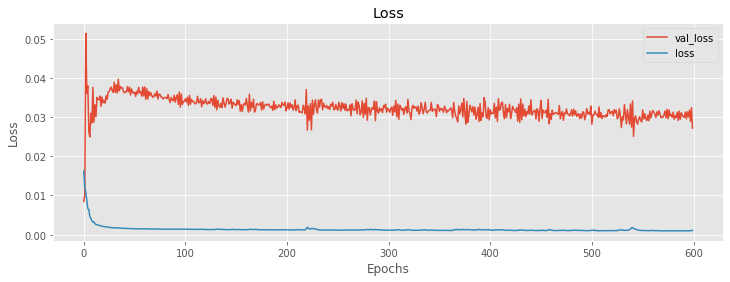

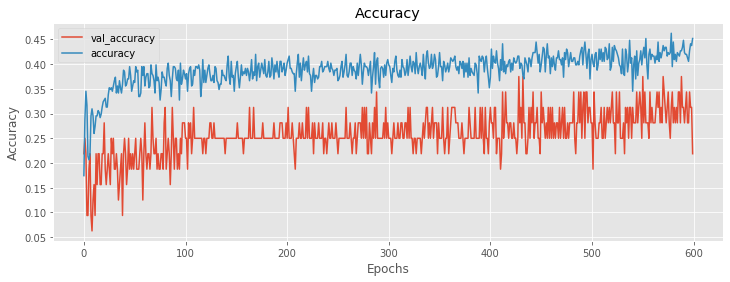

In [48]:
visualize_training_results(res)

Predicted Prices:
 [[7244.341307650447], [7212.303812280054], [7172.911762848052], [7190.444436603245], [7189.43810975564]]

Actual Prices:
 [[6881.958495999999], [6880.323242], [7117.20752], [7429.724609000001], [7538.999512]]


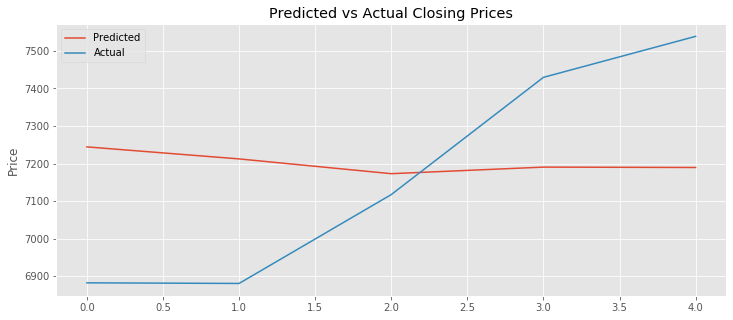

In [49]:
plt.figure(figsize=(12,5))

# Getting predictions by predicting from the last available X variable
yhat = model.predict(X[-1].reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming values back to their normal prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Getting the actual values from the last available y variable which correspond to its respective X variable
actual = scaler.inverse_transform(y[-1].reshape(-1,1))

# Printing and plotting those predictions
print("Predicted Prices:\n", yhat)
plt.plot(yhat, label='Predicted')

# Printing and plotting the actual values
print("\nActual Prices:\n", actual.tolist())
plt.plot(actual.tolist(), label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
#plt.savefig("BTC_validation.png")
plt.show()

                  Close
2020-04-24  7621.529250
2020-04-25  7744.702026
2020-04-26  7788.673978
2020-04-27  7962.370739
2020-04-28  7997.703673


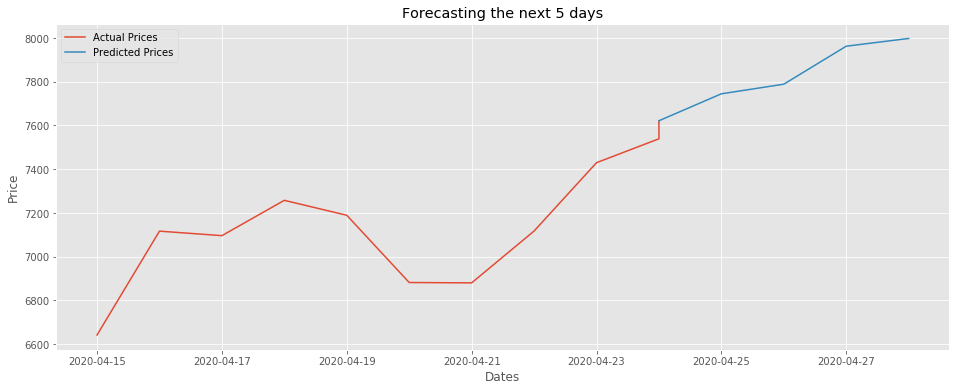

In [50]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features)).tolist()[0]

# Transforming the predicted values back to their original prices
yhat = scaler.inverse_transform(np.array(yhat).reshape(-1,1)).tolist()

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, index=pd.date_range(start=df.index[-1], periods=len(yhat), freq="D"), columns=df.columns)

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 10

# Transforming the actual values to their original price
actual = pd.DataFrame(scaler.inverse_transform(df[["Close"]].tail(pers)), index=df.Close.tail(pers).index, columns=df.columns).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
#plt.savefig("BTC_predictions.png")
plt.show()